In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set_palette(palette)

df = pd.read_csv('../../dataset/tables_clean.csv')

df = df[:10]

In [2]:
#import jacard similarity from sklearn

from sklearn.metrics import jaccard_score

#use jaccard_score to calculate the similarity between two lists

#make same size of list1 and list2
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return intersection / union
    
   

table_similarity = []

for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i != j:
            #remove the first and last character, which are brackets
            columns_1 = row1['columns'][1:-1].split(', ')
            columns_2 = row2['columns'][1:-1].split(', ')
            print(columns_1)
            print(columns_2)
            similarity = jaccard_similarity(columns_1, columns_2)
            table_similarity.append([row1['id'], row2['id'], similarity, row1['id_file'], row2['id_file']])

["'task|recommend|base|on|user|interest|and|role|positioninginstruct|recommend|a|news|item|and|it|id|from|the|candid|news|list|accord|to|the|user|interest|and|responsibilitiesinput|user|interest|and|work|task|the|news|wait|for|recommend|output|the|recommend|news|titl|and|it|id'"]
["'dataset'", "'languag'", "'user'", "'new'", "'click'", "'new|inform'"]
["'task|recommend|base|on|user|interest|and|role|positioninginstruct|recommend|a|news|item|and|it|id|from|the|candid|news|list|accord|to|the|user|interest|and|responsibilitiesinput|user|interest|and|work|task|the|news|wait|for|recommend|output|the|recommend|news|titl|and|it|id'"]
["'method'", "'mind'", "'yahoo'", "'adressa'"]
["'task|recommend|base|on|user|interest|and|role|positioninginstruct|recommend|a|news|item|and|it|id|from|the|candid|news|list|accord|to|the|user|interest|and|responsibilitiesinput|user|interest|and|work|task|the|news|wait|for|recommend|output|the|recommend|news|titl|and|it|id'"]
["'dataset'", "'user'", "'item'", "'i

In [37]:

table_similarity = pd.DataFrame(table_similarity, columns=['table1', 'table2', 'similarity','id_file1','id_file2'])
table_similarity = table_similarity[table_similarity['similarity'] > 0]
table_similarity['is_same_file'] = table_similarity['id_file1'] == table_similarity['id_file2']
table_similarity = table_similarity.sort_values(by='similarity', ascending=False)

table_similarity

,table1,table2,similarity,id_file1,id_file2,is_same_file
36999,A1.T2,A1.T1,1.00,2407.20679v1,2407.20679v1,True
160995,A1.T7,S4.T2,1.00,2406.12052v1,2406.12052v1,True
634,S5.T2,S2.T1,1.00,2406.12243v1,2406.16106v1,False
160999,A1.T7,A1.T6,1.00,2406.12052v1,2406.12052v1,True
247000,S4.T3,S4.T4,1.00,2406.15983v1,2406.15983v1,True
...,...,...,...,...,...,...
131302,S4.T4,S5.T3,0.02,2408.05353v1,2408.16009v1,False
130803,S4.T3,S5.T3,0.02,2408.05353v1,2408.16009v1,False
32695,S5.T3,S4.T2,0.02,2408.16009v1,2408.05353v1,False
32696,S5.T3,S4.T3,0.02,2408.16009v1,2408.05353v1,False


In [43]:
# split the tables into two groups, same file and different files
same_file = table_similarity[table_similarity['is_same_file'] == True]
diff_file = table_similarity[table_similarity['is_same_file'] == False]

diff_file

,table1,table2,similarity,id_file1,id_file2,is_same_file
634,S5.T2,S2.T1,1.00,2406.12243v1,2406.16106v1,False
235118,S4.T3,S4.T1,1.00,2407.19692v2,2406.06043v1,False
9936,S2.T2,S2.T1,1.00,2405.07694v2,2408.13680v1,False
227563,S2.T1,S2.T2,1.00,2408.13680v1,2405.07694v2,False
155815,S2.T6,S3.T1,1.00,2404.18961v1,2408.02208v1,False
...,...,...,...,...,...,...
131302,S4.T4,S5.T3,0.02,2408.05353v1,2408.16009v1,False
130803,S4.T3,S5.T3,0.02,2408.05353v1,2408.16009v1,False
32695,S5.T3,S4.T2,0.02,2408.16009v1,2408.05353v1,False
32696,S5.T3,S4.T3,0.02,2408.16009v1,2408.05353v1,False


In [44]:
# print best similar tables stats
best_similar_tables = diff_file.head(10)
best_similar_tables

,table1,table2,similarity,id_file1,id_file2,is_same_file
634,S5.T2,S2.T1,1.0,2406.12243v1,2406.16106v1,False
235118,S4.T3,S4.T1,1.0,2407.19692v2,2406.06043v1,False
9936,S2.T2,S2.T1,1.0,2405.07694v2,2408.13680v1,False
227563,S2.T1,S2.T2,1.0,2408.13680v1,2405.07694v2,False
155815,S2.T6,S3.T1,1.0,2404.18961v1,2408.02208v1,False
235198,S4.T3,S3.T2,1.0,2407.19692v2,2408.08231v1,False
155908,S2.T6,id45,1.0,2404.18961v1,2405.20878v1,False
210752,S3.T2,S3.T3,1.0,2408.07704v1,2405.17740v1,False
109907,id45,S3.T1,1.0,2405.20878v1,2408.02208v1,False
154318,S2.T3,S3.T1,1.0,2404.18961v1,2408.02208v1,False


In [48]:
#get the columns of a table by id

def get_columns(table_id):
    return df[df['id'] == table_id]['columns'].values[0][1:-1].split(', ')

table1 = get_columns(best_similar_tables['table1'].values[1])
table2 = get_columns(best_similar_tables['table2'].values[1])

print('Table 1:', table1)
print('Table 2:', table2)







Table 1: ["'dataset'", "'model'", "'infer'", "'train'", "'gpu|memori'"]
Table 2: ["'dataset'", "'user'", "'item'", "'interact'", "'avglength'", "'sparsiti'"]


FileNotFoundError: [Errno 2] No such file or directory: '/home/giorgio/PycharmProjects/IDD_HW/HW_1/scripts/dataviz/output/jaccard_similarity.png'

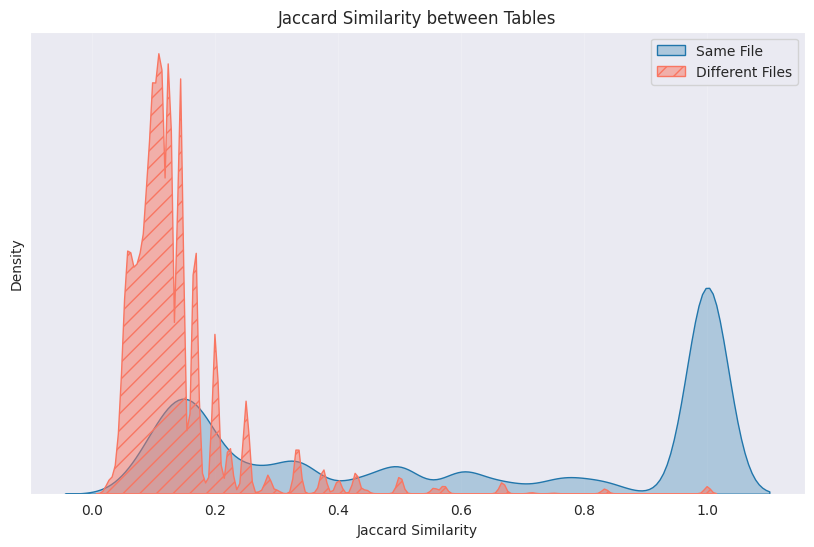

In [24]:
# plot the similarity between tables in the same file and different files
plt.figure(figsize=(10, 6))
sns.kdeplot(same_file['similarity'], color=palette[0], label='Same File', fill=True, bw_adjust=.35, alpha=0.3)
sns.kdeplot(diff_file['similarity'],  color=palette[1], label='Different Files', fill=True, bw_adjust=.35, alpha=0.5, hatch='//')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Density')
plt.yticks([])
plt.title('Jaccard Similarity between Tables')
plt.grid(alpha=0.2)
plt.legend()
plt.savefig('output/jaccard_similarity.png', dpi=300)